In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle #to save the data
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')

In [4]:
data.head() #check first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape #to know the total count of the data 

(200, 5)

In [6]:
data.info() #to know what kind of data it is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

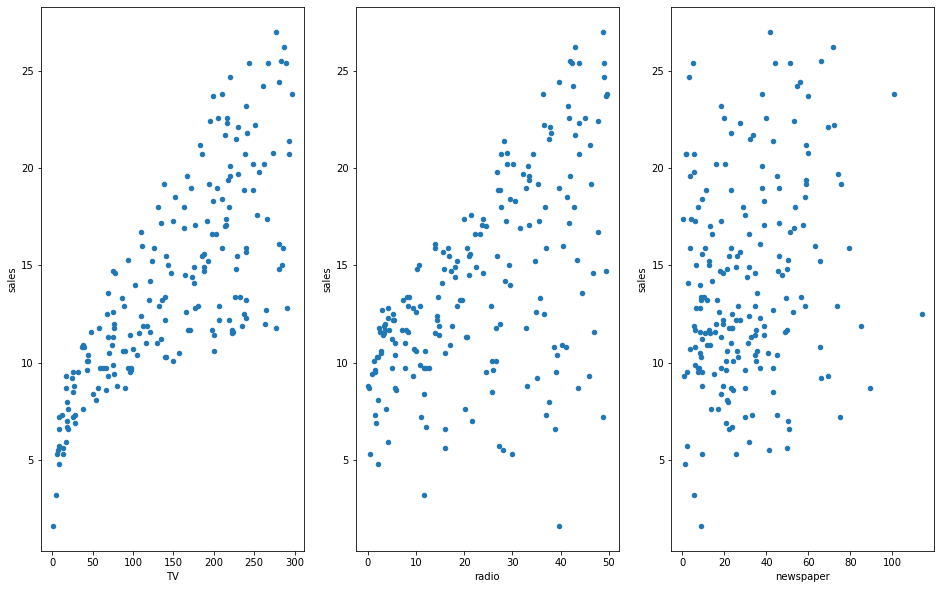

In [9]:
fig,axs = plt.subplots(1,3) #axs= (1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,10))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

In [10]:
x=data[['TV']]
y=data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [11]:
print(lm.intercept_)

7.032593549127694


In [12]:
print(lm.coef_)

[0.04753664]


In [13]:
X_new=pd.DataFrame({'TV':[50]})
X_new

,TV
0,50


In [14]:
lm.predict(X_new)

array([9.40942557])

In [16]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [19]:
#print the R-square value to the model
lm.rsquared

0.611875050850071

In [20]:
x=data[['TV','radio','newspaper']]
y=data.sales
#from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [21]:
print('intercept',lm.intercept_)
print('TV       ',lm.coef_[0])
print('Radio    ',lm.coef_[1])
print('Newspaper',lm.coef_[2])

intercept 2.9388893694594067
TV        0.04576464545539761
Radio     0.18853001691820453
Newspaper -0.00103749304247629


In [22]:
lm=smf.ols(formula='sales~TV + radio + newspaper',data=data).fit()
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        21:42:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm=smf.ols(formula='sales~TV + radio ',data=data).fit()
lm.rsquared

0.8971942610828956

In [25]:
lm=smf.ols(formula='sales~TV + radio + newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

In [26]:
lm=smf.ols(formula='sales~ newspaper',data=data).fit()
lm.rsquared

0.05212044544430516

In [27]:
lm=smf.ols(formula='sales~ TV',data=data).fit()
lm.rsquared

0.611875050850071

In [28]:
lm=smf.ols(formula='sales~ radio',data=data).fit()
lm.rsquared

0.33203245544529536

In [29]:
lm.pvalues

Intercept    3.561071e-39
radio        4.354966e-19
dtype: float64

In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           4.35e-19
Time:                        22:31:28   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [7]:
data.shape

(500, 9)

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [10]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [11]:
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [12]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [15]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


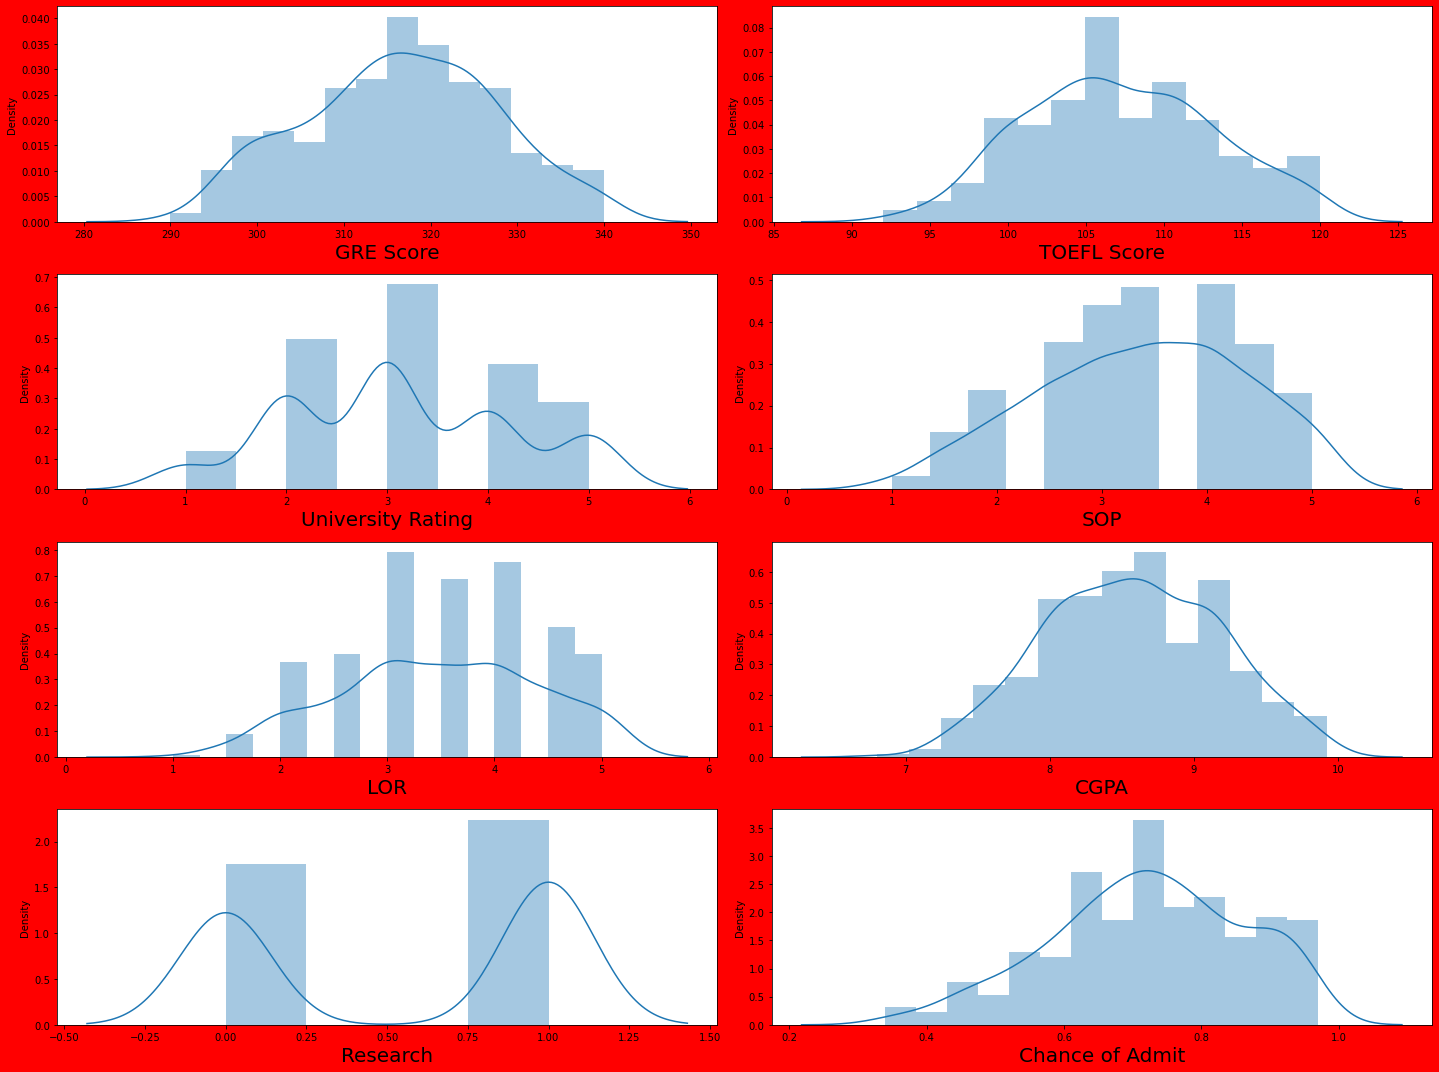

In [16]:
#data distribution
plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [17]:
#divide data set into features and labels 
y = data['Chance of Admit']
x = data.drop(columns=['Chance of Admit'])

In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [19]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


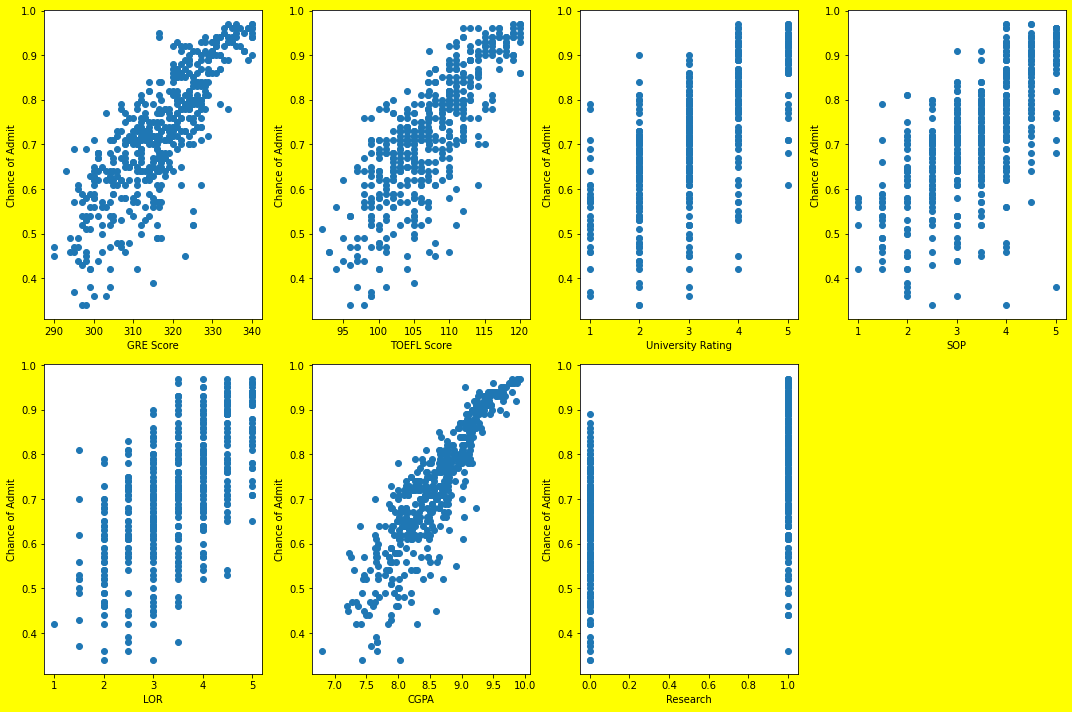

In [20]:
#Visualizing relationship
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber = 1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber+=1 
plt.tight_layout()

In [21]:
#data scalling . Formula Z=(X-mean)/std
scaler=StandardScaler()
X_scaler = scaler.fit_transform(x)

In [22]:
X_scaler

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [23]:
#split data into train and test
x_train,x_test,y_train,y_test=train_test_split=train_test_split(X_scaler,y,test_size=0.25,random_state=4999000)
y_train.head()

49     0.78
379    0.71
14     0.61
152    0.86
394    0.89
Name: Chance of Admit, dtype: float64

# Model instantiating and training


In [24]:
regression =LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [26]:
print('Chance of Admission is :',regression.predict(scaler.transform([[312.0 , 103.0 , 4.0 , 4.0 , 5.0 , 8.43 , 0 ]])))

Chance of Admission is : [0.7029158]


# You can save the model and later you can use it for prediction

In [27]:
#saving the model to the localfile system
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))
#prediction using the saved model 
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))
a

array([0.62849232])

In [28]:
#adjusted R2 score
regression.score(x_train,y_train)

0.8236106460760593

# Let's check how well model fits the test data

In [29]:
regression.score(x_test,y_test)

0.8015256090454467

# Lets plot and visualize

In [30]:
y_pred=regression.predict(x_test)

In [31]:
y_pred

array([0.58494428, 0.7809657 , 0.81257924, 0.65412163, 0.64513868,
       0.83627305, 0.70936171, 0.5188771 , 0.65883092, 0.68019102,
       0.7896106 , 0.69193054, 0.75699586, 0.51586977, 0.53189433,
       0.48386125, 0.52463063, 0.90925954, 0.51695767, 0.7103405 ,
       0.65880385, 0.4935233 , 0.90573852, 0.8078036 , 0.59978952,
       0.63709829, 0.61835078, 0.6202455 , 0.87515977, 0.80851061,
       0.64937078, 0.74632815, 0.69124257, 0.60236769, 0.65200258,
       0.58386728, 0.65582475, 0.78038302, 0.69719773, 0.7350013 ,
       0.63334648, 0.79484522, 0.53173622, 0.73008425, 0.69034914,
       0.67324602, 0.6660591 , 0.80550606, 0.69444047, 0.52692517,
       0.80418555, 0.96867314, 0.61988764, 0.7964773 , 0.67106698,
       0.63404167, 0.61034131, 0.57599834, 0.81786076, 0.72070085,
       0.65418464, 0.82992406, 0.79994553, 0.70475189, 0.8560007 ,
       0.79839   , 0.85446912, 0.77100601, 0.80664352, 0.93228275,
       0.60966396, 0.81672854, 0.70254184, 0.87201672, 0.63928

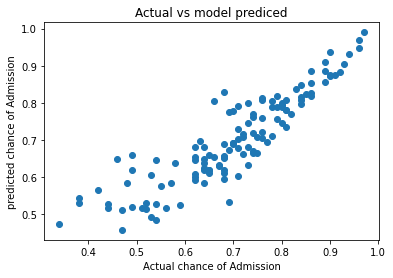

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of Admission')
plt.ylabel('predicted chance of Admission')
plt.title('Actual vs model prediced')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
y_pred = regression.predict(x_test)

In [35]:
y_pred

array([0.58494428, 0.7809657 , 0.81257924, 0.65412163, 0.64513868,
       0.83627305, 0.70936171, 0.5188771 , 0.65883092, 0.68019102,
       0.7896106 , 0.69193054, 0.75699586, 0.51586977, 0.53189433,
       0.48386125, 0.52463063, 0.90925954, 0.51695767, 0.7103405 ,
       0.65880385, 0.4935233 , 0.90573852, 0.8078036 , 0.59978952,
       0.63709829, 0.61835078, 0.6202455 , 0.87515977, 0.80851061,
       0.64937078, 0.74632815, 0.69124257, 0.60236769, 0.65200258,
       0.58386728, 0.65582475, 0.78038302, 0.69719773, 0.7350013 ,
       0.63334648, 0.79484522, 0.53173622, 0.73008425, 0.69034914,
       0.67324602, 0.6660591 , 0.80550606, 0.69444047, 0.52692517,
       0.80418555, 0.96867314, 0.61988764, 0.7964773 , 0.67106698,
       0.63404167, 0.61034131, 0.57599834, 0.81786076, 0.72070085,
       0.65418464, 0.82992406, 0.79994553, 0.70475189, 0.8560007 ,
       0.79839   , 0.85446912, 0.77100601, 0.80664352, 0.93228275,
       0.60966396, 0.81672854, 0.70254184, 0.87201672, 0.63928

In [36]:
mean_absolute_error(y_test,y_pred)

0.04495355944934854

In [37]:
mean_squared_error(y_test,y_pred)

0.003721029637518518

In [38]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.061000242929995924

In [39]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [ ]:
#lasso Regularization

In [40]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [41]:
#best alpha parameter 
alpha= lasscv.alpha_
alpha

1.7163488372267317e-05

In [42]:
#know the bets paramater 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.7163488372267317e-05)

In [43]:
lasso_reg.score(x_test,y_test)

0.801525782688516

In [44]:
#RidgeCV will return best alpha and coefficient after performing 10 cross validation
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize =True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [45]:
ridgecv.alpha_

0.011

In [46]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [47]:
ridge_model.score(x_test,y_test)

0.8015266034860851